In [2]:
import sys
sys.path.append("..")

import os
import json
import numpy as np
import datetime as dt
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
config = {
    "cohort folder": os.path.join("..", "output", "data", "COHORT_21JAN2021_31AUG2021"),
    "survival folder": os.path.join("..", "output", "data", "SURVIVAL_21JAN2021_31AUG2021"),
    "seed": 1,
    "t_init": "t_13",
    "prefix": "corona"
}

In [33]:
df_pair = pd.read_csv(os.path.join(config["cohort folder"], f"pareados_{config['prefix']}_{config['seed']}.csv"), dtype={"CPF": str, "PAR": str})
df_info = pd.read_csv(os.path.join(config["cohort folder"], f"pop_reservoir_{config['prefix']}.csv"), dtype={"cpf": str})

surv_files = os.path.join(config["survival folder"], f"seed_{config['seed']}", config["t_init"])
survival_tables = {
    "D1": pd.read_csv(os.path.join(surv_files, f"survival_tb_D1_{config['t_init']}_{config['seed']}.csv"), index_col=0),
    "D2": pd.read_csv(os.path.join(surv_files, f"survival_tb_D2_{config['t_init']}_{config['seed']}.csv"), index_col=0),
    "D1_M": pd.read_csv(os.path.join(surv_files, f"survival_tb_D1_M_{config['t_init']}_{config['seed']}.csv"), index_col=0),
    "D2_M": pd.read_csv(os.path.join(surv_files, f"survival_tb_D2_M_{config['t_init']}_{config['seed']}.csv"), index_col=0),
    "D1_F": pd.read_csv(os.path.join(surv_files, f"survival_tb_D1_F_{config['t_init']}_{config['seed']}.csv"), index_col=0),
    "D2_F": pd.read_csv(os.path.join(surv_files, f"survival_tb_D2_F_{config['t_init']}_{config['seed']}.csv"), index_col=0),
    "D1_6069": pd.read_csv(os.path.join(surv_files, f"survival_tb_D1_6069_{config['t_init']}_{config['seed']}.csv"), index_col=0),
    "D1_7079": pd.read_csv(os.path.join(surv_files, f"survival_tb_D1_7079_{config['t_init']}_{config['seed']}.csv"), index_col=0),
    "D1_80+": pd.read_csv(os.path.join(surv_files, f"survival_tb_D1_80+_{config['t_init']}_{config['seed']}.csv"), index_col=0),
    "D2_6069": pd.read_csv(os.path.join(surv_files, f"survival_tb_D2_6069_{config['t_init']}_{config['seed']}.csv"), index_col=0),
    "D2_7079": pd.read_csv(os.path.join(surv_files, f"survival_tb_D2_7079_{config['t_init']}_{config['seed']}.csv"), index_col=0),
    "D2_80+": pd.read_csv(os.path.join(surv_files, f"survival_tb_D2_80+_{config['t_init']}_{config['seed']}.csv"), index_col=0),
}

with open(os.path.join(config["survival folder"], f"seed_{config['seed']}", "intervals.json"), "r") as f:
    intervals = json.load(f)

C:\Users\higor.monteiro\Miniconda3\envs\geopandas_testenv\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (7,8,9,10,12,13,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [56]:
def get_ve(survival_tables):
    info_dict = {
        "D1 14-20": None, "D1 14-27": None, "D2 14-150": None
    }
    
    RESULTS = {
        "GERAL": dict(info_dict),
        "MASC": dict(info_dict),
        "FEM": dict(info_dict),
        "6069": dict(info_dict),
        "7079": dict(info_dict),
        "80+": dict(info_dict)
    }

    # GERAL
    RESULTS["GERAL"]["D1 14-20"] = survival_tables["D1"]["1 - Risk Ratio"].loc[20]
    RESULTS["GERAL"]["D1 14-27"] = survival_tables["D1"]["1 - Risk Ratio"].loc[40]
    RESULTS["GERAL"]["D2 14-150"] = survival_tables["D2"]["1 - Risk Ratio"].loc[150]

    # MASC
    RESULTS["MASC"]["D1 14-20"] = survival_tables["D1_M"]["1 - Risk Ratio"].loc[20]
    RESULTS["MASC"]["D1 14-27"] = survival_tables["D1_M"]["1 - Risk Ratio"].loc[40]
    RESULTS["MASC"]["D2 14-150"] = survival_tables["D2_M"]["1 - Risk Ratio"].loc[150]

    # FEM
    RESULTS["FEM"]["D1 14-20"] = survival_tables["D1_F"]["1 - Risk Ratio"].loc[20]
    RESULTS["FEM"]["D1 14-27"] = survival_tables["D1_F"]["1 - Risk Ratio"].loc[40]
    RESULTS["FEM"]["D2 14-150"] = survival_tables["D2_F"]["1 - Risk Ratio"].loc[150]

    # 60-69
    RESULTS["6069"]["D1 14-20"] = survival_tables["D1_6069"]["1 - Risk Ratio"].loc[20]
    RESULTS["6069"]["D1 14-27"] = survival_tables["D1_6069"]["1 - Risk Ratio"].loc[40]
    RESULTS["6069"]["D2 14-150"] = survival_tables["D2_6069"]["1 - Risk Ratio"].loc[150]

    # 70-79
    RESULTS["7079"]["D1 14-20"] = survival_tables["D1_7079"]["1 - Risk Ratio"].loc[20]
    RESULTS["7079"]["D1 14-27"] = survival_tables["D1_7079"]["1 - Risk Ratio"].loc[40]
    RESULTS["7079"]["D2 14-150"] = survival_tables["D2_7079"]["1 - Risk Ratio"].loc[150]

    # 80+
    RESULTS["80+"]["D1 14-20"] = survival_tables["D1_80+"]["1 - Risk Ratio"].loc[20]
    RESULTS["80+"]["D1 14-27"] = survival_tables["D1_80+"]["1 - Risk Ratio"].loc[40]
    RESULTS["80+"]["D2 14-150"] = survival_tables["D2_80+"]["1 - Risk Ratio"].loc[150]

    return RESULTS


def plot_survival(survival_tables, mode=None, xlim=None):
    '''
    
    '''
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

    str_d1 = "D1"
    str_d2 = "D2"
    if mode is not None:
        str_d1 += mode
        str_d2 += mode

    tb_1, tb_2 = survival_tables[str_d1].reset_index(), survival_tables[str_d2].reset_index()

    sns.lineplot(x="t_f(caso)", y="KM S^(t)(caso)", data=tb_1, ax=ax1, color="tab:blue", label="vaccinated(D1)", lw=2, ls=":")
    sns.lineplot(x="t_f(caso)", y="KM S^(t)(controle)", data=tb_1, ax=ax1, color="tab:red", label="unvaccinated(D1)", lw=2, ls=":")

    sns.lineplot(x="t_f(caso)", y="KM S^(t)(caso)", data=tb_2, ax=ax1, color="tab:blue", label="vaccinated(D2)")
    sns.lineplot(x="t_f(caso)", y="KM S^(t)(controle)", data=tb_2, ax=ax1, color="tab:red", label="unvaccinated(D2)")

    sns.lineplot(x="t_f(caso)", y="1 - Risk Ratio", data=tb_1, ax=ax2, color="tab:blue", label="D1")
    sns.lineplot(x="t_f(caso)", y="1 - Risk Ratio", data=tb_2, ax=ax2, color="tab:red", label="D2")

    ax2.set_ylim([0.0, 1.0])
    for axis in [ax1, ax2]:
        axis.grid(alpha=0.3)
        if xlim is not None:
            axis.set_xlim([xlim[0], xlim[1]])
    
    return fig, (ax1, ax2)



In [51]:
RES = get_ve(survival_tables)

(<Figure size 720x360 with 2 Axes>,
 (<AxesSubplot:xlabel='t_f(caso)', ylabel='KM S^(t)(caso)'>,
  <AxesSubplot:xlabel='t_f(caso)', ylabel='1 - Risk Ratio'>))

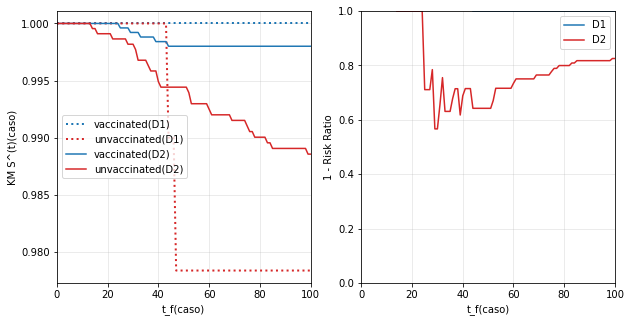

In [60]:
plot_survival(survival_tables, mode="_80+", xlim=[0,100])

In [35]:
survival_tables["D2_M"]

,n_f(caso),m_f(caso),q_f(caso),KM S^(t)(caso),1 - KM(caso),KM S^(t) - Confidence Interval(caso),KM S^(t) lower(caso),KM S^(t) upper(caso),t_f(controle),n_f(controle),m_f(controle),q_f(controle),KM S^(t)(controle),1 - KM(controle),KM S^(t) - Confidence Interval(controle),KM S^(t) lower(controle),KM S^(t) upper(controle),1 - Risk Ratio,1 - Risk Ratio (CI_lower),1 - Risk Ratio (CI_upper)
t_f(caso),,,,,,,,,,,,,,,,,,,,
0,14596,0,29112,1.000000,0.000000,0.000000,1.000000,1.000000,0,14408,0,29304,1.000000,0.000000,0.00000,1.000000,1.000000,NaN,NaN,NaN
1,12874,0,279,1.000000,0.000000,0.000000,1.000000,1.000000,1,12682,6,282,1.000000,0.000000,0.00000,1.000000,1.000000,NaN,NaN,NaN
2,12595,0,94,1.000000,0.000000,0.000000,1.000000,1.000000,2,12394,9,94,1.000000,0.000000,0.00000,1.000000,1.000000,NaN,NaN,NaN
3,12501,0,509,1.000000,0.000000,0.000000,1.000000,1.000000,3,12291,1,508,1.000000,0.000000,0.00000,1.000000,1.000000,NaN,NaN,NaN
4,11992,0,573,1.000000,0.000000,0.000000,1.000000,1.000000,4,11782,2,574,1.000000,0.000000,0.00000,1.000000,1.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,89,0,20,0.999267,0.000733,0.000549,0.998718,0.999817,196,85,0,20,0.995974,0.004026,0.00125,0.994724,0.997224,0.818033,0.605156,0.91614
197,69,0,17,0.999267,0.000733,0.000549,0.998718,0.999817,197,65,0,17,0.995974,0.004026,0.00125,0.994724,0.997224,0.818033,0.605156,0.91614
198,52,0,13,0.999267,0.000733,0.000549,0.998718,0.999817,198,48,0,12,0.995974,0.004026,0.00125,0.994724,0.997224,0.818033,0.605156,0.91614
